먼저 야후 파이낸스로부터 주식 정보를 가져오는 yfinance 모듈을 살펴볼게요. yfinance를 설치하고 기본적인 사용법을 알아볼 거에요. 

---

# [실습 1] yfinance 모듈 설치

yfinance 모듈은 기본 모듈이 아니기 때문에 설치를 해야 해요. yfinance 모듈을 설치해주세요.

``` python
# 힌트
pip install 설치할 모듈 이름   # 아나콘다 프롬프트 또는 터미널
!pip install 설치할 모듈 이름  # 주피터 노트북, 코랩

```

잘 모르겠다면 **409쪽 설치 및 기본 사용법**을 살펴보세요.

In [3]:
# 여기에 코드를 작성해주세요.
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


---

# [실습 2] yfinance 임포트하고 사용해보기

**삼성전자**의 **2022년 11월 1일~30일** 주식 데이터를 가져와보세요. 참고로, 삼성전자의 ticker_symbol은 **005930.KS**에요.

``` python
# 힌트
# 1. yfinance, pandas 임포트 (yf, pd라는 별명으로)
import 모듈명 as 별명

# 2. ticker_symbol 변수를 만들고 알맞은 값 할당
ticker_symbol = "티커심볼"

# 3. Ticker 객체를 반환
ticker_data = yf.Ticker(ticker_symbol)

# 4. 기간을 설정해 주식 데이터 가져오기
df = ticker_data.history(start="시작일", end="종료일")

# 5. 데이터의 앞부분 일부 출력하기
df.head()
```

잘 모르겠다면 **409쪽 설치 및 기본 사용법**을 살펴보세요. 시작일과 종료일은 작은 따옴표와 함께 'YYYY-MM-DD' 형식으로 작성해야 해요.

In [2]:
# 1. yfinance, pandas 임포트 (yf, pd라는 별명으로)
# 여기에 코드를 작성해주세요.
import yfinance as yf
import pandas as pd

# 2. ticker_symbol 변수를 만들고 알맞은 값 할당
# 여기에 코드를 작성해주세요.
ticker_symbol="005930.KS"

# 3. Ticker 객체를 반환
# 여기에 코드를 작성해주세요.
ticker = yf.Ticker(ticker_symbol)

# 4. 기간을 설정해 주식 데이터 가져오기
# 여기에 코드를 작성해주세요.
df = ticker.history(start = "2022-11-01", end = "2022-11-30")

# 5. 데이터의 앞부분 일부 출력하기
# 여기에 코드를 작성해주세요.
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-01 00:00:00+09:00,59900.0,60300.0,59500.0,60000.0,17201647,0.0,0.0
2022-11-02 00:00:00+09:00,59700.0,60000.0,59300.0,59600.0,13202919,0.0,0.0
2022-11-03 00:00:00+09:00,58600.0,59800.0,58100.0,59200.0,17492162,0.0,0.0
2022-11-04 00:00:00+09:00,59100.0,59500.0,58400.0,59400.0,12445841,0.0,0.0
2022-11-07 00:00:00+09:00,59700.0,60300.0,59400.0,60200.0,12437246,0.0,0.0


---

## 우리에게 필요한 것 = ticker_symbol
실습2에서 살펴봤듯이 **최종적으로 필요한건 ticker_symbol**이에요. ticker_symbol은 종목 코드와 마켓 타입(코스피라면 .KS, 코스닥이라미녀 .KQ)을 더해 만들어요.

```
ex) 삼성전자 주식 정보 데이터를 조회하려면 삼성전자 종목코드와 코스피를 더한 티커 심볼인 "005930.KS"가 필요해요.
```

&nbsp;

이어서 티커 심볼을 구하는 *get_ticker_symbol() 함수*를 만들어볼게요. 

---

*get_ticker_symbol() 함수*는,
 
[매개변수]
- 매개변수 *company_name*으로 회사명을 전달받아요(NAVER, 삼성전자 등)
- 매개변수 *market_type*으로 마켓 유형을 전달받아요(코스피 또는 코스닥)
&nbsp;

[함수 내부]
1. get_stock_info() 함수를 호출해서 market_type에 해당하는 전체 상장법인 목록을 가져와요.
2. 1에서 가져온 전체 상장법인 목록 중에서 company_name에 해당하는 종목코드를 구해요.
3. 마켓 타입에 맞춰 ticker_symbol을 구성해요. ticker_symbol은 종목코드와 함께 코스피/코스닥 주식의 심볼(.KS, ,KQ)을 더해 만들어요.

[반환]  
- 3에서 구성한 ticker_symbol을 반환해요.

```
ex) "삼성전자", "kospi를 인자로 전달받았다면,
1. get_stock_info 함수를 호출해서 kospi에 해당하는 전체 상장법인 목록을 가져와요.
2. 전체 상장법인 목록 중에서 삼성전자에 해당하는 종목코드를 구해요.
3. 종목코드와 함께 코스피 주식의 심볼(.KS)을 더해 티커 심볼(005930.KS)을 만들어요.

- 티커 심볼(005930.KS)을 반환해요.
```




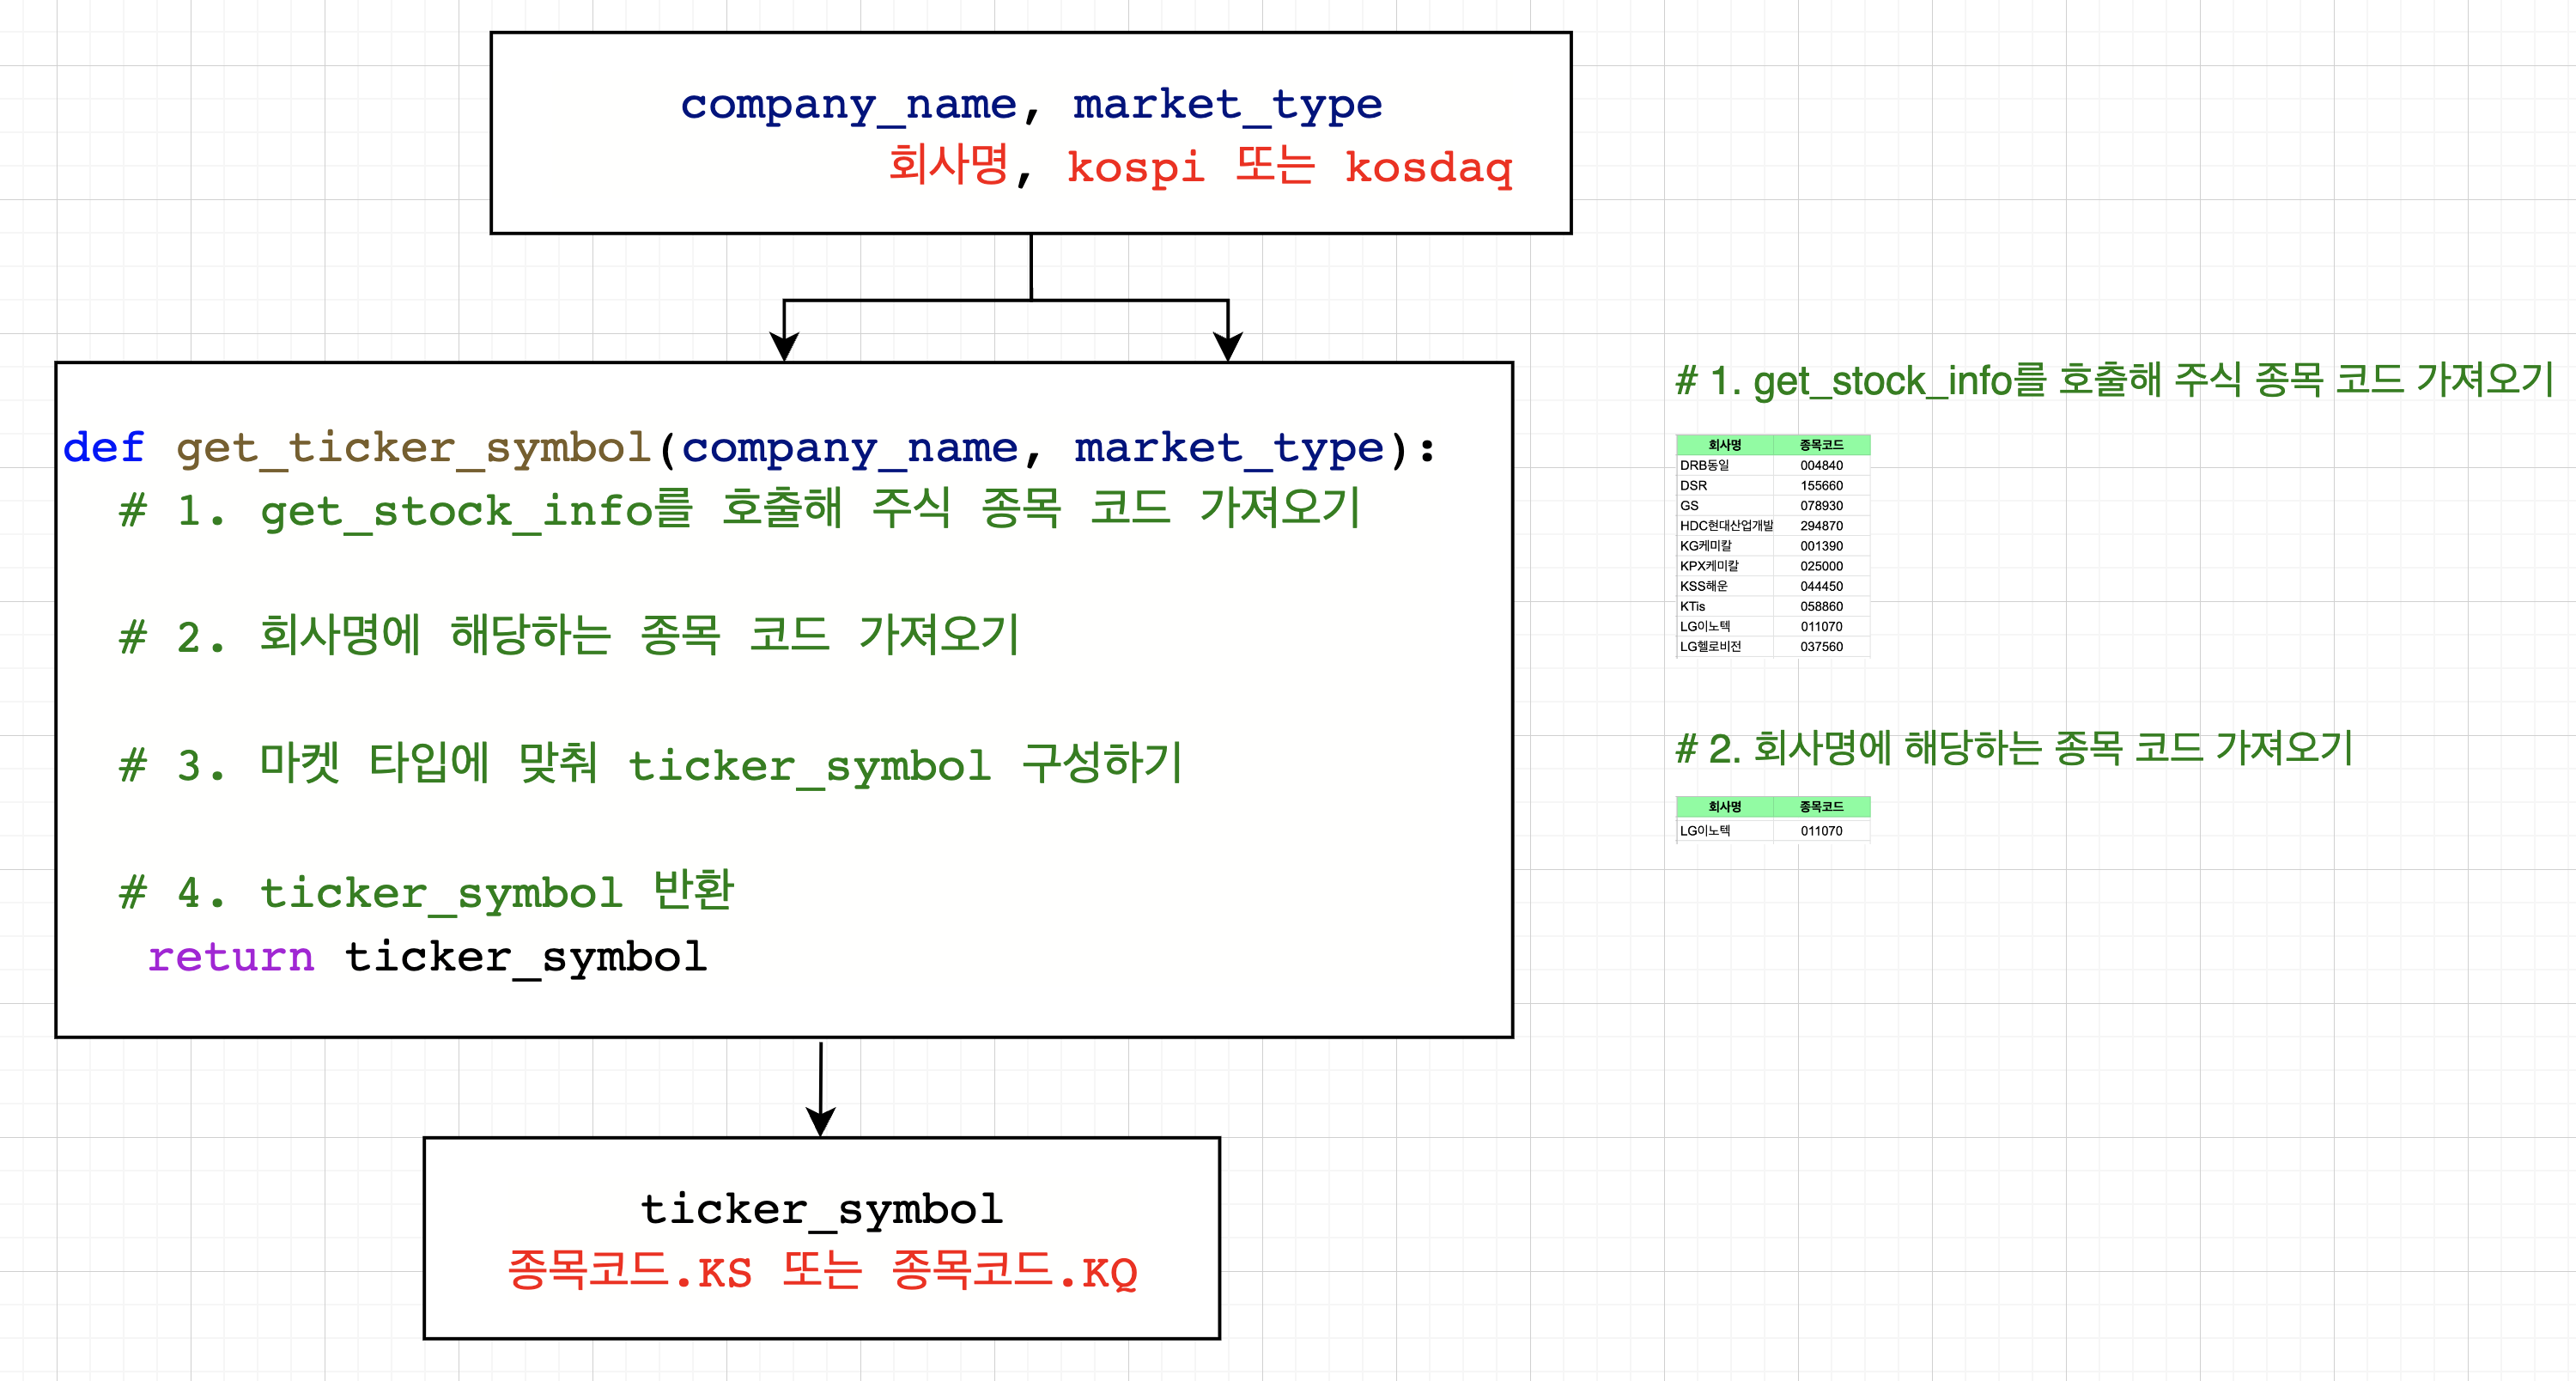

# [실습 3] 함수 구조 만들기

**get_ticker_symbol()** 함수의 구조를 만들어주세요.
- 함수명: get_ticker_symbol
- 매개변수: 2개, company_name, market_type
- market_type 매개변수의 기본값: None
- 반환값: ticker_symbol

``` python
# 힌트
def 함수명(매개면수명, 매개변수명=기본값):

  return 반환값
```

기억이 잘 나지 않는다면 **3.1.1 함수의 정의와 호출**를 살펴보세요.

In [3]:
# 여기에 코드를 작성해주세요.

# [실습 4] 함수에서 해야 할 일을 주석으로 작성하기

**get_ticker_symbol()** 함수에서 해야 할 일을 주석으로 작성해주세요.

1. get_stock_info를 호출해 주식 종목 코드 가져오기
2. 회사명에 해당하는 종목 코드 가져오기
3. 마켓 타입에 맞춰 ticker_symbol 구성하기
4. ticker_symbol 반환

``` python
# 힌트
def 함수명(매개변수명, 매개변수명=기본값):
  # 한줄 주석은 앞에 샵(#)을 붙여줍니다.

  return 반환값
```

주석에 관한 설명은 **13페이지 상단 참고 상자**를 살펴보세요.

In [ ]:
def get_ticker_symbol(company_name, market_type=None):
  # 여기에 코드를 작성해주세요.
  
  return ticker_symbol

---

# [실습 5] 1번 주석 구현하기

get_stock_info() 함수를 호출해 주식 정보 데이터를 가져오세요. get_stcok_info() 함수는 어제 완성한 함수를 그대로 이용합니다.

1) df 변수 만들기
- get_stock_info() 함수는 데이터프레임을 반환합니다. 반환 받은 데이터프레임을 담을 변수를 선언해주세요. 변수 이름은 *df*로 만듭니다.


2) get_stock_info() 함수를 호출합니다. 
- 인자로 *market_type*을 전달합니다.

&nbsp;

변수가 잘 기억나지 않는다면 **2일차 실습 노트**를 살펴보세요.  
함수를 호출하는 방법이 잘 기억나지 않는다면 **3.1.1 함수의 정의와 호출**를 살펴보세요.

In [ ]:
# ----------------------------------------
# 아래 코드는 어제 완성한 코드입니다. 수정하지 마세요!
# 한국 주식 종목 코드를 가져오는 함수
# ----------------------------------------
def get_stock_info(market_type=None):
    # 한국거래소(KRX)에서 전체 상장법인 목록 가져오기
    base_url =  "http://kind.krx.co.kr/corpgeneral/corpList.do"
    method = "download"
    if market_type == 'kospi':
        marketType = "stockMkt"  # 주식 종목이 코스피인 경우
    elif market_type == 'kosdaq':
        marketType = "kosdaqMkt" # 주식 종목이 코스닥인 경우
    elif market_type == None:
        marketType = ""
    url = "{0}?method={1}&marketType={2}".format(base_url, method, marketType)

    df = pd.read_html(url, header=0)[0]

    # 종목코드 열을 6자리 숫자로 표시된 문자열로 변환
    df['종목코드']= df['종목코드'].apply(lambda x: f"{x:06d}")

    # 회사명과 종목코드 열 데이터만 남김
    df = df[['회사명','종목코드']]

    return df

# ----------------------------------------
# 오늘 구현할 코드는 아래 코드입니다. 
# yfinance에 이용할 Ticker 심볼을 반환하는 함수
# ----------------------------------------
def get_ticker_symbol(company_name, market_type=None):
  # 1. get_stock_info() 함수를 호출해 주식 정보 데이터 가져오기
  #  ㄴ 1) df 변수 만들기
  #  ㄴ 2) get_stock_info() 함수 호출하기
  #  ㄴ 3) market_type을 인자로 전달하기
  # 여기에 코드를 작성해주세요.

  # 2. 회사명에 해당하는 종목 코드 가져오기
  
  # 3. 마켓 타입에 맞춰 ticker_symbol 구성하기

  #4. ticker_symbol 반환
  return ticker_symbol

---

# [실습 6] 2번 주석 구현하기

회사명에 해당하는 종목 코드를 가져오세요.

&nbsp;

회사명에 해당하는 종목코드를 가져올 차례에요. 단계를 나눠 살펴볼게요.

1) 먼저 **회사명이 company_name인 데이터를 가져와**볼게요. 가져온 데이터는 **df_company 데이터프레임에 담아**주세요.

2) df_company 데이터프레임에서 **종목코드에 해당하는 값만 가져와**볼게요. 가져온 데이터는 **code 변수에 담아**주세요.

3) 1번과 2번 코드를 합쳐보세요.

4) code 배열에 담긴 첫 번째 값 가져오기.

``` python
# 힌트
# 1) 회사명이 company_name 데이터의 가져오기
# 잘 모르겠다면 195~199페이지를 살펴봐주세요.
df_gs = df[df['열 이름']=='가져오고자 하는 회사명']

# 2) 종목코드에 해당하는 값만 가져오기
code = df_gs['가져오고자하는 열'].values

# 3) 1번 코드와 2번 코드를 합치기
code = df[df['열 이름']=='가져오고자 하는 회사명']['가져오고자하는 열'].values

# 4) 배열에 담긴 첫 번째 값 가져오기
code = code[0]
```

행과 열 데이터를 선택하는 방법이 잘 기억나지 않는다면 **4일차 실습 노트의 [실습 4] 부분**을 살펴보세요.  


In [ ]:
# ----------------------------------------
# yfinance에 이용할 Ticker 심볼을 반환하는 함수
# ----------------------------------------
def get_ticker_symbol(company_name, market_type=None):
  # 1. get_stock_info() 함수를 호출해 주식 정보 데이터 가져오기
  df = get_stock_info(market_type)

  # 2. 회사명에 해당하는 종목 코드 가져오기
  #  ㄴ 1) 회사명이 company_name 데이터의 가져오기
  # 여기에 코드를 작성해주세요.

  #  ㄴ 2) 종목코드에 해당하는 값만 가져오기
  # 여기에 코드를 작성해주세요.

  #  ㄴ 3) 1번 코드와 2번 코드를 합치기
  # 여기에 코드를 작성해주세요.

  # ㄴ 4) 배열에 담긴 첫 번째 값 가져오기
  # 여기에 코드를 작성해주세요.

  # 3. 마켓 타입에 맞춰 ticker_symbol 구성하기

  #4. ticker_symbol 반환
  return ticker_symbol

---

# [실습 7] 3번 주석 구현하기

조건문을 작성하고, 매개변수로 전달 받은 market_type에 따라 티커 심볼을 구성해주세요.
- 마켓 타입이 kospi라면 티커 심볼은 종목코드.KS
- 마켓 타입이 kosdaq이라면 티커 심볼은 종목코드.KQ

조건문이 잘 기억나지 않는다면 **2일차 실습 노트**를 살펴보세요.

In [ ]:
# ----------------------------------------
# yfinance에 이용할 Ticker 심볼을 반환하는 함수
# ----------------------------------------
def get_ticker_symbol(company_name, market_type=None):
  # 1. get_stock_info() 함수를 호출해 주식 정보 데이터 가져오기
  df = get_stock_info(market_type)

  # 2. 회사명에 해당하는 종목 코드 가져오기
  code = df[df['회사명']==company_name]['종목코드'].values
  code = code[0]

  # 3. 마켓 타입에 맞춰 ticker_symbol 구성하기
  # 여기에 코드를 작성해주세요.
    
  #4. ticker_symbol 반환
  return ticker_symbol

---

# [실습 8] 주식 데이터 가져오기

마지막으로 지금까지 완성한 *get_ticker_symbol()* 함수가 잘 동작하는지 확인하고, *yfinance 모듈*을 활용해 야후 파이낸스로부터 주식 정보를 가져올 차례에요.

1) 주식 종목과 마켓 타입을 지정해 티커 심볼 구하기
- get_ticker_symbol() 함수를 호출해 티커 심볼을 구해볼게요. 
- 인자로는 "삼성전자", "kospi" 또는 관심 있는 종목을 전달해보세요.
- 반환받은 값은 ticker_symbol 변수에 담아주세요.

2) 야후 파이낸스로부터 Ticker 객체 가져오기
- yf.Ticker() 함수를 호출해서 주식 정보를 가져올게요.
- 가져온 데이터는 ticker_data 변수에 담아주세요.

3) 기간을 설정해 주식 데이터 가져오기
- 시작일과 종료일을 지정해 주식 데이터를 가져올게요.
- 시작일은 2022년 11월 1일, 종료일은 2022년 11월 30일로 지정해보세요.
- 시작일과 종료일은 YYYY-MM-DD 형태로 전달해야 해요 (예: 2022-11-01)

4) 주식 정보 출력하기
- 주식 정보를 잘 가져왔는지 확인하기 위해 print() 함수로 ticker_data를 출력해주세요.

``` python
# 힌트
# 1) 주식 종목과 마켓 타입을 지정해 티커 심볼 구하기
ticker_symbol = get_ticker_symbol("종목명", "마켓 타입")

# 2) 야후 파이낸스로부터 주식 정보 가져오기
ticker_data = yf.Ticker(ticker_symbol)

# 3) 기간을 설정해 주식 데이터 가져오기
df = ticker_data.history(start='시작일', end='종료일')

# 4) 데이터의 앞부분 일부 출력하기
df.head()
```

잘 이해되지 않는 부분이 있다면 **8.5.3 국내 주식 데이터 가져오기**를 살펴보세요.

In [4]:
# 1) 주식 종목과 마켓 타입을 지정해 티커 심볼 구하기
# 여기에 코드를 작성해주세요.

# 2) 야후 파이낸스로부터 Ticker 객체 가져오기
# 여기에 코드를 작성해주세요.

# 3) 기간을 설정해 주식 데이터 가져오기
# 여기에 코드를 작성해주세요.

# 4) 데이터의 앞부분 일부 출력하기
# 여기에 코드를 작성해주세요.

---

# 마무리

이번 스터디에서 가장 중요한 두 개의 함수를 모두 완성했어요. 마지막으로, 오늘 완성한 코드를 다시 한 번 살펴보며 마무리해주세요.

```python
#----------------------------------------------------
# yfinance에 이용할 Ticker 심볼을 반환하는 함수
#----------------------------------------------------
def get_ticker_symbol(company_name, market_type):
    df = get_stock_info(market_type)
    code = df[df['회사명']==company_name]['종목코드'].values
    code = code[0]
    
    if market_type == 'kospi':
        ticker_symbol = code +".KS" # 코스피 주식의 심볼
    elif market_type == 'kosdaq':
        ticker_symbol = code +".KQ" # 코스닥 주식의 심볼
    
    return ticker_symbol
#---------------------------------------------------------
```

지금까지 완성한 두 가지 함수 get_stock_info(), get_ticker_symbol() 함수의 흐름을 살펴볼까요?

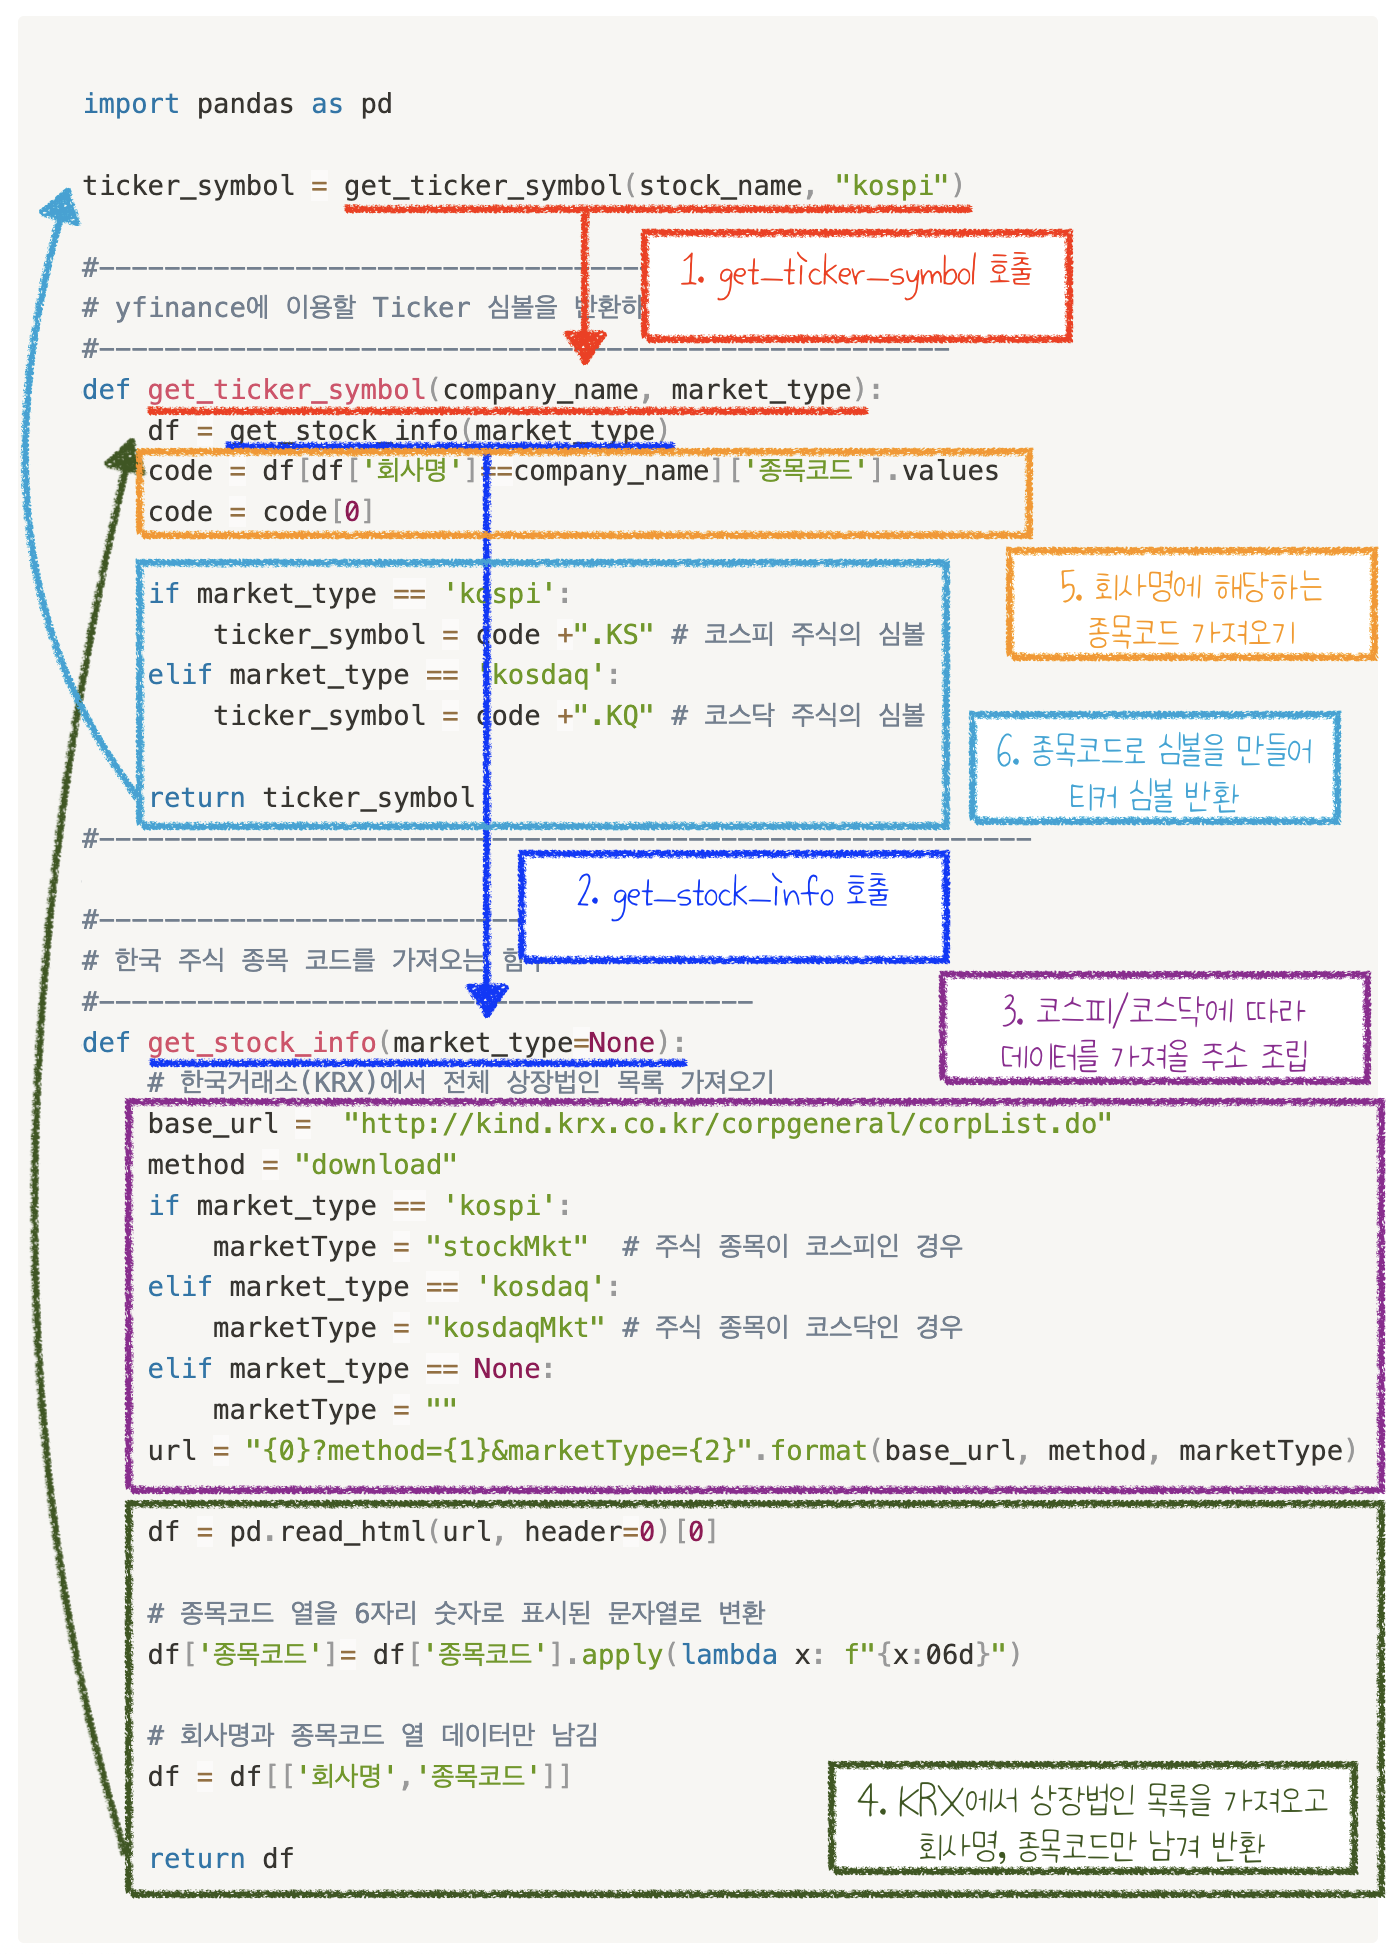

---
실제 주고받는 값과 함께 다시 한 번 흐름을 살펴볼게요.

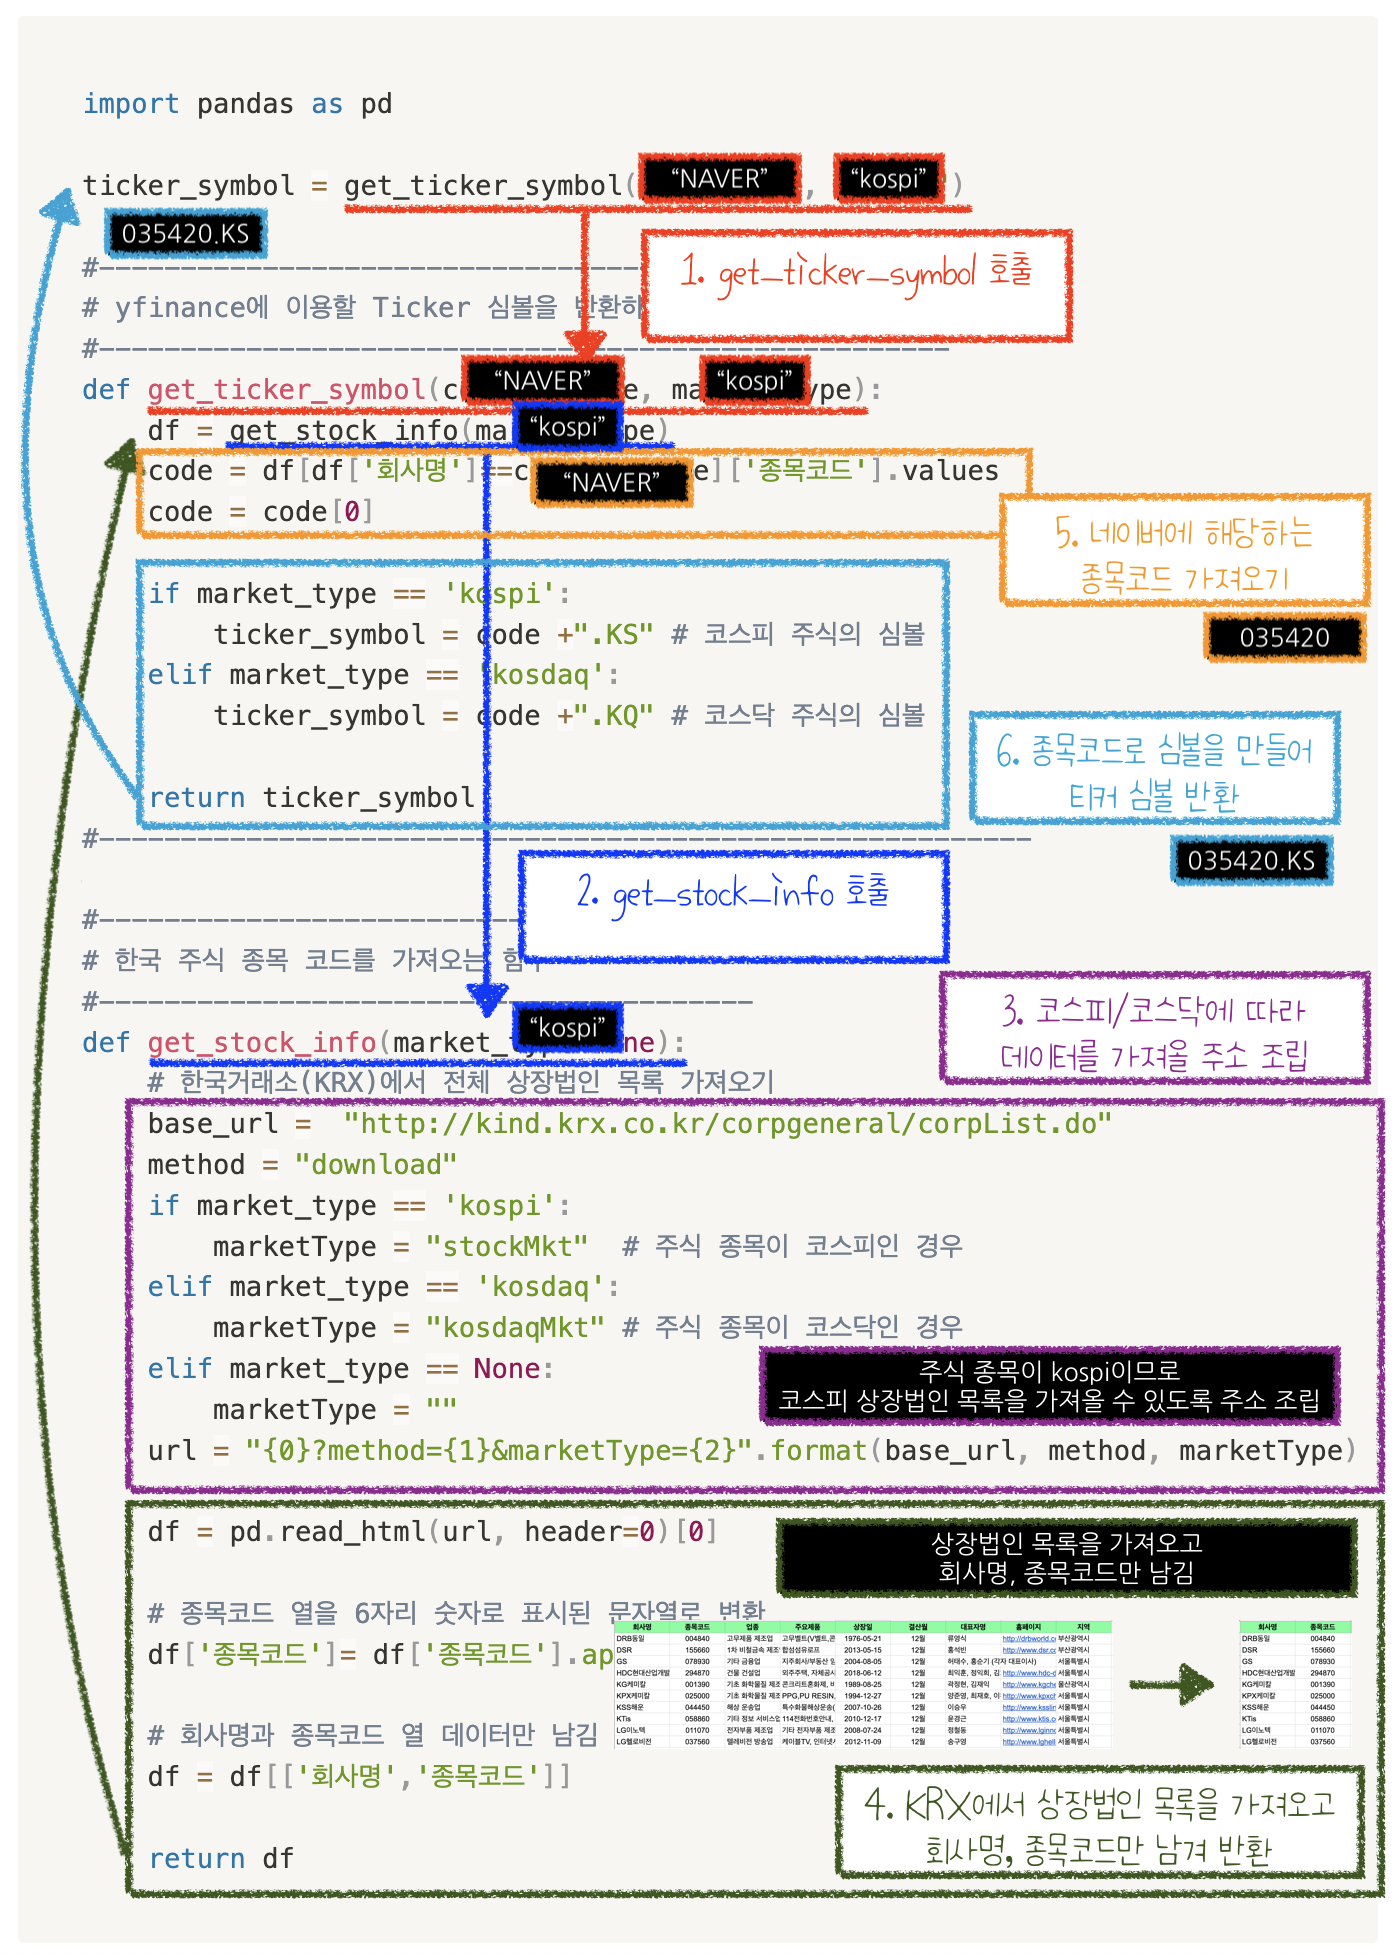